# Duration to Find Circular Autocomplementary Codes by Length

Source: https://chat.openai.com/c/997969ce-d865-4aad-9ee7-18b662bd0b30

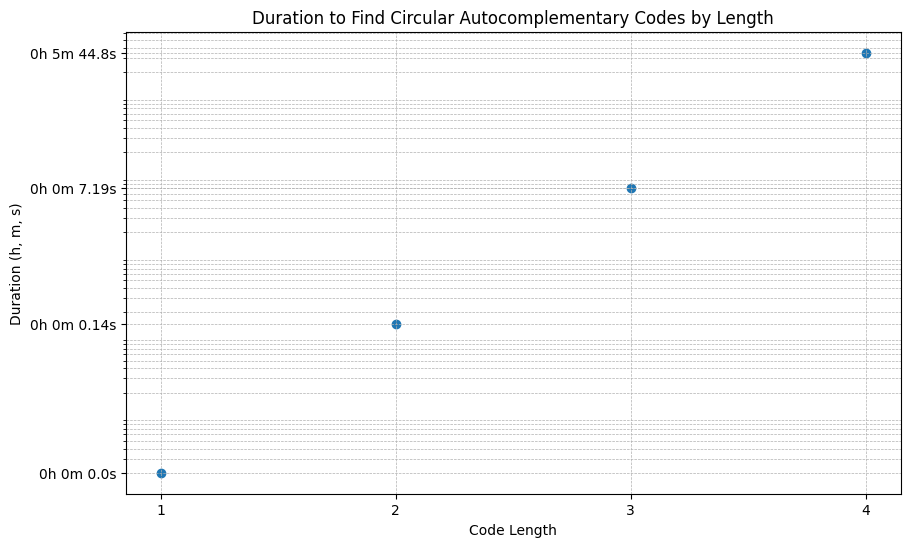

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.array([1, 2, 3, 4])
y = np.array([0.002, 0.142, 7.193, 344.803])  # seconds

# Convert seconds to human-readable format (hours, minutes, seconds)
def seconds_to_hms(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = seconds % 60
    return f"{hours}h {minutes}m {round(seconds, 2)}s"

y_labels = [seconds_to_hms(sec) for sec in y]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.yscale('log')
plt.xticks(x, labels=[str(code_length) for code_length in x])
plt.yticks(y, labels=y_labels)
plt.xlabel('Code Length')
plt.ylabel('Duration (h, m, s)')
plt.title('Duration to Find Circular Autocomplementary Codes by Length')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

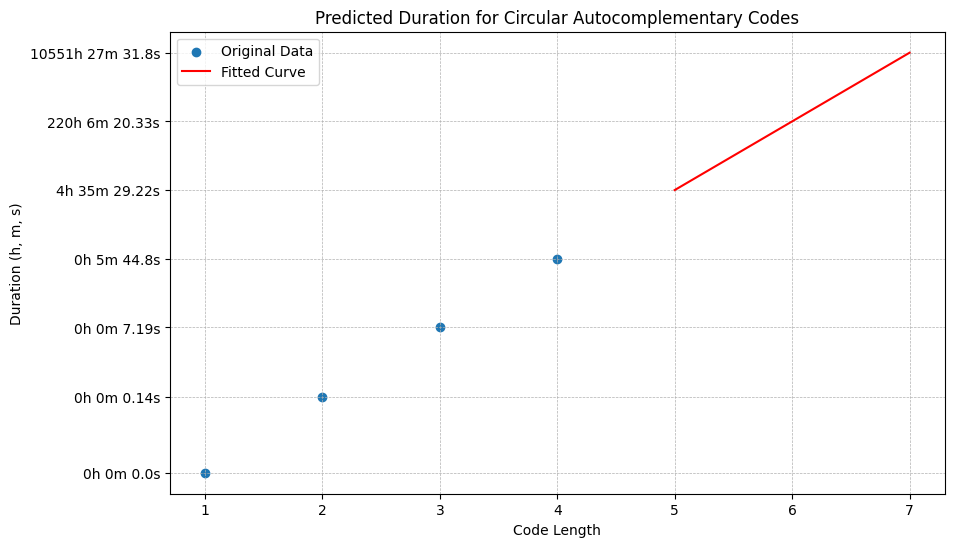

(array([1.65292201e+04, 7.92380331e+05, 3.79852518e+07]),
 ['4h 35m 29.22s', '220h 6m 20.33s', '10551h 27m 31.8s'])

In [2]:
from scipy.optimize import curve_fit

# Define the exponential function to fit
def exp_function(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential curve to the data
params, _ = curve_fit(exp_function, x, y)

# Predicted values for lengths 5, 6, and 7
x_pred = np.array([5, 6, 7])
y_pred = exp_function(x_pred, *params)

# Convert predicted values to human-readable format
y_pred_labels = [seconds_to_hms(sec) for sec in y_pred]

# Plotting the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x_pred, y_pred, color='red', label='Fitted Curve')
plt.yscale('log')
plt.xticks(np.concatenate((x, x_pred)), labels=[str(code_length) for code_length in np.concatenate((x, x_pred))])
plt.yticks(np.concatenate((y, y_pred)), labels=[seconds_to_hms(sec) for sec in np.concatenate((y, y_pred))])
plt.xlabel('Code Length')
plt.ylabel('Duration (h, m, s)')
plt.title('Predicted Duration for Circular Autocomplementary Codes')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

# Returning the predicted durations
y_pred, y_pred_labels

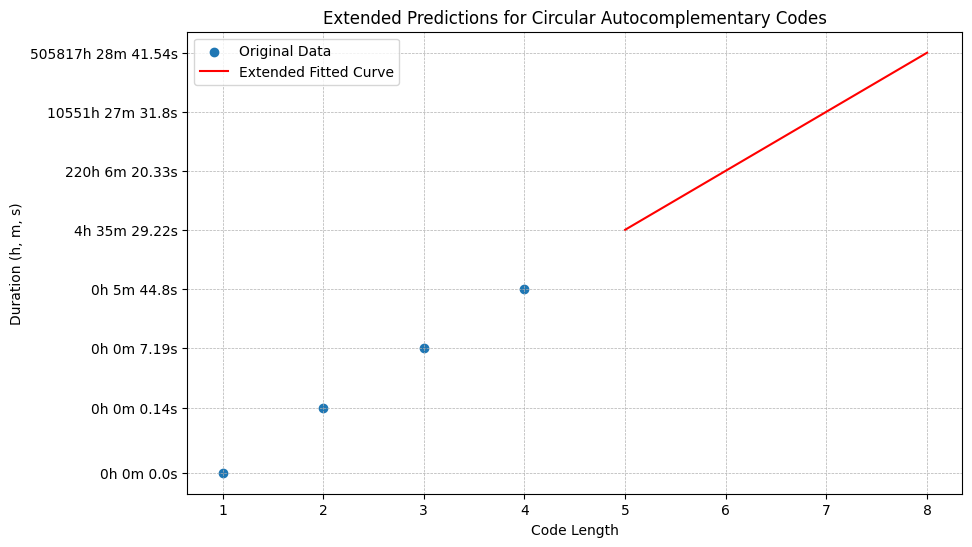

(array([1.65292201e+04, 7.92380331e+05, 3.79852518e+07, 1.82094292e+09]),
 ['4h 35m 29.22s', '220h 6m 20.33s', '10551h 27m 31.8s', '505817h 28m 41.54s'])

In [3]:
# Predicted values for lengths 5, 6, 7, and 8
x_pred_extended = np.array([5, 6, 7, 8])
y_pred_extended = exp_function(x_pred_extended, *params)

# Convert predicted values to human-readable format
y_pred_labels_extended = [seconds_to_hms(sec) for sec in y_pred_extended]

# Plotting the original data and the extended fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x_pred_extended, y_pred_extended, color='red', label='Extended Fitted Curve')
plt.yscale('log')
plt.xticks(np.concatenate((x, x_pred_extended)), labels=[str(code_length) for code_length in np.concatenate((x, x_pred_extended))])
plt.yticks(np.concatenate((y, y_pred_extended)), labels=[seconds_to_hms(sec) for sec in np.concatenate((y, y_pred_extended))])
plt.xlabel('Code Length')
plt.ylabel('Duration (h, m, s)')
plt.title('Extended Predictions for Circular Autocomplementary Codes')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

# Returning the extended predicted durations
y_pred_extended, y_pred_labels_extended

C:\Users\mdrou\AppData\Local\Temp\ipykernel_22676\3659113880.py:22: RuntimeWarning: invalid value encountered in log
  params, _ = curve_fit(lambda x, a, b: np.log(exponential_curve(x, a, b)), x, np.log(y_seconds))


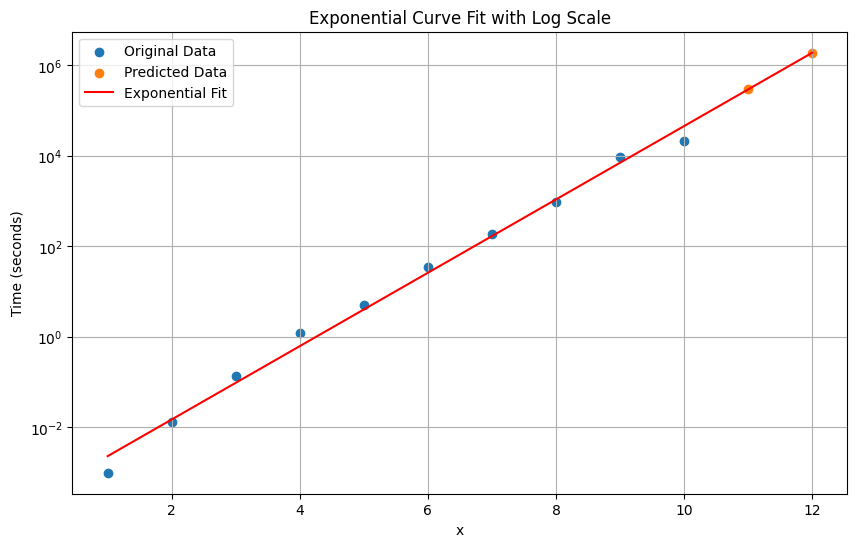

Index(['3 days 08:56:24.894059988', '21 days 18:24:59.273162160'], dtype='object')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_times = ["0:00:00.001", "0:00:00.013", "0:00:00.134", "0:00:01.191", "0:00:04.952",
           "0:00:35.267", "0:03:03.709", "0:16:10.927", "2:33:00.306", "5:55:55.479"]

# Convert time strings to seconds
def time_to_seconds(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + float(s)

y_seconds = np.array([time_to_seconds(time) for time in y_times])

# Exponential curve fitting
def exponential_curve(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(lambda x, a, b: np.log(exponential_curve(x, a, b)), x, np.log(y_seconds))

# Predicted values
x_pred = np.array([11, 12])
y_pred = exponential_curve(x_pred, *params)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y_seconds, label='Original Data')
plt.scatter(x_pred, y_pred, label='Predicted Data')
plt.plot(np.append(x, x_pred), exponential_curve(np.append(x, x_pred), *params), label='Exponential Fit', color='red')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Time (seconds)')
plt.title('Exponential Curve Fit with Log Scale')
plt.legend()
plt.grid(True)
plt.show()

# Return predicted values in seconds
y_pred_seconds = pd.to_timedelta(y_pred, unit='s').astype(str)
y_pred_seconds

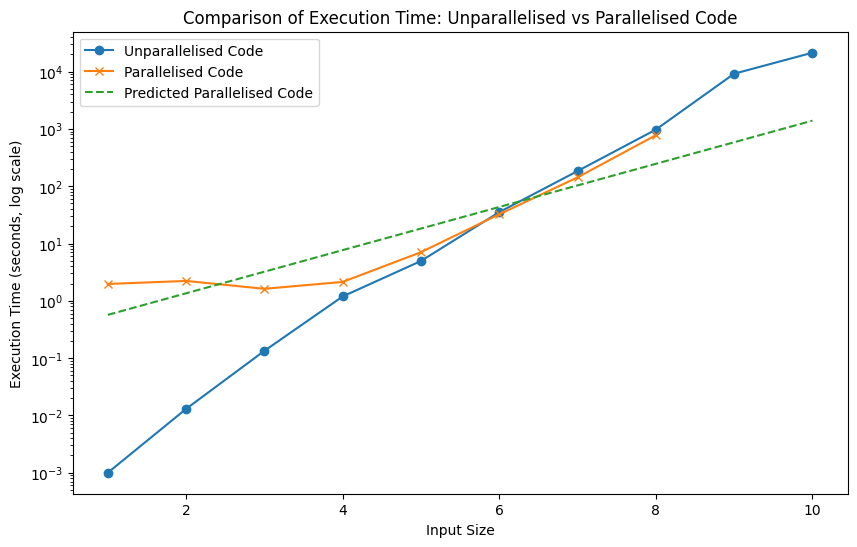

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Data for unparallelised code
unparallelised_data = [
    (1, "0:00:00.001"),
    (2, "0:00:00.013"),
    (3, "0:00:00.134"),
    (4, "0:00:01.191"),
    (5, "0:00:04.952"),
    (6, "0:00:35.267"),
    (7, "0:03:03.709"),
    (8, "0:16:10.927"),
    (9, "2:33:00.306"),
    (10, "5:55:55.479")
]

# Data for parallelised code
parallelised_data = [
    (1, "0:00:01.968"),
    (2, "0:00:02.223"),
    (3, "0:00:01.620"),
    (4, "0:00:02.136"),
    (5, "0:00:07.057"),
    (6, "0:00:32.358"),
    (7, "0:02:22.565"),
    (8, "0:12:55.418")
]

# Convert time strings to seconds
def convert_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
    delta = timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second, microseconds=time_obj.microsecond)
    return delta.total_seconds()

unparallelised_seconds = [convert_to_seconds(item[1]) for item in unparallelised_data]
parallelised_seconds = [convert_to_seconds(item[1]) for item in parallelised_data]

# Plotting the data
plt.figure(figsize=(10, 6))

# Unparallelised data plot
unparallelised_x, _ = zip(*unparallelised_data)
plt.plot(unparallelised_x, unparallelised_seconds, label='Unparallelised Code', marker='o')

# Parallelised data plot
parallelised_x, _ = zip(*parallelised_data)
plt.plot(parallelised_x, parallelised_seconds, label='Parallelised Code', marker='x')

# Set logarithmic scale for Y-axis
plt.yscale('log')

# Labels and title
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds, log scale)')
plt.title('Comparison of Execution Time: Unparallelised vs Parallelised Code')
plt.legend()

# Predicting future values for parallelised series assuming exponential growth
# Fit an exponential curve to the parallelised data
coefficients = np.polyfit(parallelised_x, np.log(parallelised_seconds), 1)
polynomial = np.poly1d(coefficients)
predicted_x = np.arange(1, 11)  # Predicting for inputs 1 to 10
predicted_y = np.exp(polynomial(predicted_x))

# Plot the predicted values
plt.plot(predicted_x, predicted_y, label='Predicted Parallelised Code', linestyle='--')

plt.legend()
plt.show()